In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
def plot(X, Y, Rxx, RH):
    cols = np.unique(X).shape[0]
    Rxx = Rxx.reshape(-1, cols)
    RH = RH.reshape(-1, cols)

    fig = plt.figure(figsize=(16, 4))
    
    ax1 = fig.add_subplot(1, 2, 1)
    im1 = ax1.imshow(Rxx, aspect='auto', origin='lower', extent=[min(X), max(X), min(Y), max(Y)])
    ax1.set_xlabel('$X$')
    ax1.set_ylabel('$Y$')
    ax1.set_title('Rxx')
    plt.colorbar(im1)

    ax2 = fig.add_subplot(1, 2, 2)
    im2 = ax2.imshow(RH, aspect='auto', origin='lower', extent=[min(X), max(X), min(Y), max(Y)])
    ax2.set_xlabel('$X$')
    ax2.set_ylabel('$Y$')
    ax2.set_title('RH')
    plt.colorbar(im2)
    plt.show()

# Getting previous data

In [3]:
%%time
data = np.loadtxt('landaufan.dat')

CPU times: user 796 ms, sys: 4 ms, total: 800 ms
Wall time: 799 ms


In [4]:
print(data.shape)
X = data[:, 0]
Y = data[:, 1]
Rxx = data[:, 3]
RH = data[:, 4]

(32481, 15)


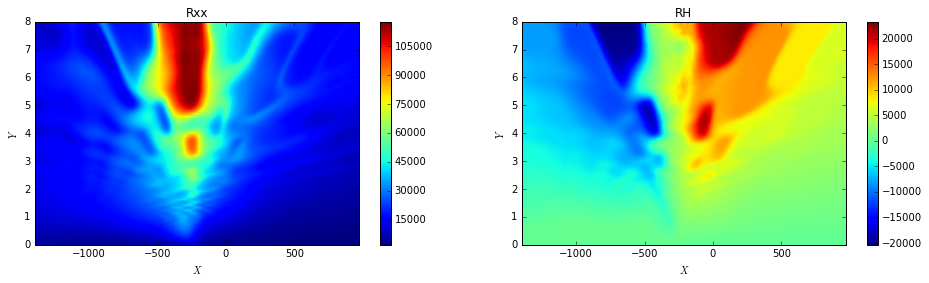

In [5]:
plot(X, Y, Rxx, RH)

# Saving in as HDF5

## Creating storage file

In [6]:
import h5py
f = h5py.File('landaufan.h5', 'w')

In [7]:
print('group name: ', f.name),
print('contains: ', list(f.keys()))

group name:  /
contains:  []


## Creating group for data

In [8]:
grp = f.create_group('data')
sub = grp.create_group('sub')

In [9]:
print('Now main file contains:', list(f))         # list(f) == list(f.keys())
print('and our group contains:', list(grp))

Now main file contains: ['data']
and our group contains: ['sub']


In [10]:
print('sub name:', sub.name)

sub name: /data/sub


In [11]:
del grp['sub']                          # removes sub from grp
print('group contains:', list(grp))

group contains: []


## Adding data

In [12]:
grp['X'] = X
grp['Y'] = Y
grp['Rxx'] = Rxx
grp['RH'] = RH

In [13]:
print('Now group contains:', list(grp))

Now group contains: ['RH', 'Rxx', 'X', 'Y']


In [14]:
def print_attrs(name, obj):
    print("{:10} of type: {}".format(name, type(obj)))

f.visititems(print_attrs)

data       of type: <class 'h5py._hl.group.Group'>
data/RH    of type: <class 'h5py._hl.dataset.Dataset'>
data/Rxx   of type: <class 'h5py._hl.dataset.Dataset'>
data/X     of type: <class 'h5py._hl.dataset.Dataset'>
data/Y     of type: <class 'h5py._hl.dataset.Dataset'>


## Datasets

(are basically like numpy arrays)

In [15]:
X = f['data/X']

In [16]:
print("shape: {}, dtype: {}".format(X.shape, X.dtype))
print("elements: {}".format(X[:5]))

shape: (32481,), dtype: float64
elements: [-1400.     -1394.0625 -1388.125  -1382.1875 -1376.25  ]


In [17]:
X = np.asarray(X)
print(type(X), X[:5])

<class 'numpy.ndarray'> [-1400.     -1394.0625 -1388.125  -1382.1875 -1376.25  ]


### Remember to close your file

In [18]:
f.close()

# cleaner

In [19]:
data = np.loadtxt('landaufan.dat')
info = {'X': 0, 'Y': 1, 'Rxx': 3, 'RH': 4}

In [20]:
%%time
np.savetxt('landaufan.dat', data)

CPU times: user 464 ms, sys: 20 ms, total: 484 ms
Wall time: 484 ms


In [21]:
%%time
with h5py.File('landaufan.h5', 'w') as f:
    grp = f.create_group('data')
    for k, v in info.items():
        grp[k] = data[:, v]

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 4.13 ms


# Let's load and check

In [22]:
%%time
with h5py.File('landaufan.h5', 'r') as f:
    data = f['data']
    X = data['X'][:]
    Y = data['Y'][:]
    Rxx = data['Rxx'][:]
    RH = data['RH'][:]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.95 ms


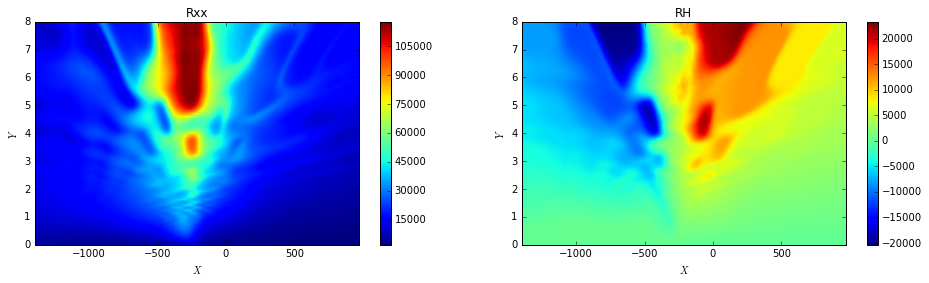

In [23]:
plot(X, Y, Rxx, RH)